# Sitemap Assay

A playground for seeing how we can eval sitemaps up front.

Doesn't actually do anything yet that would do that.  ;) 

References:
* [AdvTools](https://advertools.readthedocs.io/en/master/advertools.sitemaps.html)
* [Sitemap viz](https://www.ayima.com/us/insights/analytics-and-cro/how-to-visualize-an-xml-sitemap-using-python.html)

## Notes

Some commands of note

```
 curl -s https://geoconnex.us/sitemap/nhdplusv2/huc12pp/huc12pp__1.xml |  grep -oP '<loc>\K[^<]*'
 ```
 
 
 The following exposes GeoJSON, not JSON-LD
 
 ```
 curl -LH "Accept: application/ld+json"   https://geoconnex.us/nhdplusv2/huc12/030601020107
 ```
 


In [1]:
import advertools as adv

In [2]:
%%time 
%%capture cap --no-stderr  --no-stdout

iow_sitemap = adv.sitemap_to_df('https://geoconnex.us/sitemap.xml')

2021-12-01 07:34:01,981 | INFO | sitemaps.py:419 | sitemap_to_df | Getting  https://geoconnex.us/sitemap/CUAHSI/CUAHSI_HIS_CUISO_ids__0.xml 
2021-12-01 07:34:01,992 | INFO | sitemaps.py:419 | sitemap_to_df | Getting  https://geoconnex.us/sitemap/CUAHSI/CUAHSI_HIS_Clarksburg_SP_ids__0.xml 
2021-12-01 07:34:02,003 | INFO | sitemaps.py:419 | sitemap_to_df | Getting  https://geoconnex.us/sitemap/CUAHSI/CUAHSI_HIS_Hassberge_ids__0.xml 
2021-12-01 07:34:02,013 | INFO | sitemaps.py:419 | sitemap_to_df | Getting  https://geoconnex.us/sitemap/CUAHSI/CUAHSI_HIS_Weiherbach_ids__0.xml 
2021-12-01 07:34:02,031 | INFO | sitemaps.py:419 | sitemap_to_df | Getting  https://geoconnex.us/sitemap/CUAHSI/CUAHSI_HIS_ODM_KentState_ids__0.xml 
2021-12-01 07:34:02,077 | INFO | sitemaps.py:419 | sitemap_to_df | Getting  https://geoconnex.us/sitemap/CUAHSI/CUAHSI_HIS_NEON_ids__0.xml 
2021-12-01 07:34:02,236 | INFO | sitemaps.py:419 | sitemap_to_df | Getting  https://geoconnex.us/sitemap/CUAHSI/CUAHSI_HIS_Nooksac

CPU times: user 53.6 s, sys: 4.55 s, total: 58.1 s
Wall time: 59.2 s


In [3]:
iow_sitemap['loc'] = iow_sitemap['loc'].astype('str')
# iow_sitemap.dtypes

In [4]:
iow_sitemap.head()

,loc,lastmod,sitemap,etag,sitemap_last_modified,sitemap_size_mb,download_date,errors
0,https://geoconnex.us/cuahsi/his/CUISO/1,2021-11-23 15:03:02.707105+00:00,https://geoconnex.us/sitemap/CUAHSI/CUAHSI_HI...,49f-5d1760b17ab80,2021-11-23 15:03:26+00:00,0.001128,2021-12-01 13:34:02.029109+00:00,NaN
1,https://geoconnex.us/cuahsi/his/CUISO/2,2021-11-23 15:03:02.707141+00:00,https://geoconnex.us/sitemap/CUAHSI/CUAHSI_HI...,49f-5d1760b17ab80,2021-11-23 15:03:26+00:00,0.001128,2021-12-01 13:34:02.029109+00:00,NaN
2,https://geoconnex.us/cuahsi/his/CUISO/3,2021-11-23 15:03:02.707163+00:00,https://geoconnex.us/sitemap/CUAHSI/CUAHSI_HI...,49f-5d1760b17ab80,2021-11-23 15:03:26+00:00,0.001128,2021-12-01 13:34:02.029109+00:00,NaN
3,https://geoconnex.us/cuahsi/his/CUISO/4,2021-11-23 15:03:02.707181+00:00,https://geoconnex.us/sitemap/CUAHSI/CUAHSI_HI...,49f-5d1760b17ab80,2021-11-23 15:03:26+00:00,0.001128,2021-12-01 13:34:02.029109+00:00,NaN
4,https://geoconnex.us/cuahsi/his/CUISO/5,2021-11-23 15:03:02.707197+00:00,https://geoconnex.us/sitemap/CUAHSI/CUAHSI_HI...,49f-5d1760b17ab80,2021-11-23 15:03:26+00:00,0.001128,2021-12-01 13:34:02.029109+00:00,NaN


## Unique Sitemaps URLs and resource URLs in IoW

We can quickly grabe the unique URLs from the sitemap column and see how many unique sitemap.xml files we are working with

In [5]:
usm = iow_sitemap.sitemap.unique()
uloc = iow_sitemap["loc"].unique()
print("There are {} unique sitemap XML files pointing to {} unique resources of interest".format(len(usm), len(uloc)))

There are 177 unique sitemap XML files pointing to 3453533 unique resources of interest


## Analyzing the URLs

We can also dive into the URL structure a bit.  Since the base for the URLs is all the same with geoconnex.us, we can drop down to the next level of the URL and see what that tells us.

In [6]:
# Break down all the URL into theor path parts
urldf = adv.url_to_df(list(iow_sitemap['loc']))
urldf.head()

,url,scheme,netloc,path,query,fragment,dir_1,dir_2,dir_3,dir_4,dir_5,dir_6,dir_7,dir_8
0,https://geoconnex.us/cuahsi/his/CUISO/1,,,https://geoconnex.us/cuahsi/his/CUISO/1,,,https:,,geoconnex.us,cuahsi,his,CUISO,1,NaN
1,https://geoconnex.us/cuahsi/his/CUISO/2,,,https://geoconnex.us/cuahsi/his/CUISO/2,,,https:,,geoconnex.us,cuahsi,his,CUISO,2,NaN
2,https://geoconnex.us/cuahsi/his/CUISO/3,,,https://geoconnex.us/cuahsi/his/CUISO/3,,,https:,,geoconnex.us,cuahsi,his,CUISO,3,NaN
3,https://geoconnex.us/cuahsi/his/CUISO/4,,,https://geoconnex.us/cuahsi/his/CUISO/4,,,https:,,geoconnex.us,cuahsi,his,CUISO,4,NaN
4,https://geoconnex.us/cuahsi/his/CUISO/5,,,https://geoconnex.us/cuahsi/his/CUISO/5,,,https:,,geoconnex.us,cuahsi,his,CUISO,5,NaN


In [7]:
# We can not aggregate at various levels...   
e4 = urldf["dir_4"].value_counts()
e4.rename_axis("sources")

e4df = e4.to_frame()
e4df.head(len(e4)) 

,dir_4
usgs,1671925
wade,800234
ref,427492
nmwdi,254736
cuahsi,126404
nhdplusv2,82533
epa,82533
ornl,3416
ca-gage-assessment,2772
chyld-pilot,1502


In [8]:
# With a little trial and error we can see the cutoff for a chart 
ts = e4df.tail(10)['dir_4'].sum()
print(ts)

90249


In [9]:
e4topdf = e4df.head(6)  ## don't do this!
e4topdf.reset_index(inplace = True, drop = False)
e4topdf.rename(columns={'index': 'source', 'dir_4':'count'},  inplace = True)

t = e4topdf.append({'source':'other', 'count':ts}, ignore_index=True) 
t.head(10)

/home/fils/.conda/envs/kglab/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,source,count
0,usgs,1671925
1,wade,800234
2,ref,427492
3,nmwdi,254736
4,cuahsi,126404
5,nhdplusv2,82533
6,other,90249


<AxesSubplot:ylabel='count'>

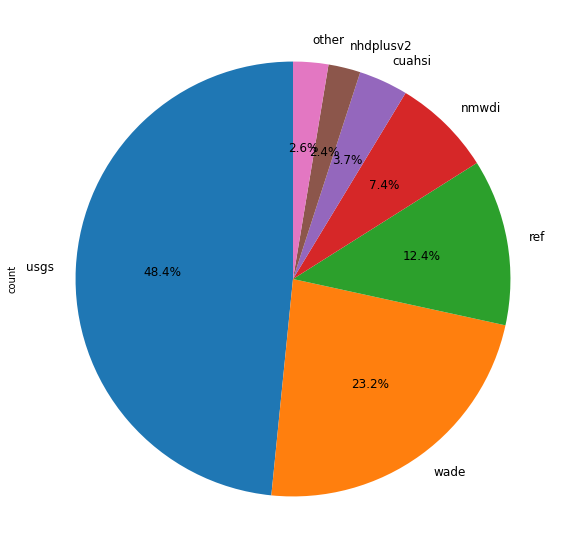

In [10]:
import matplotlib.pyplot as plt
from pandas.plotting import table

plt.figure(figsize=(30,10))

# plot chart
ax1 = plt.subplot(121, aspect='equal')
t.plot(kind='pie', y = 'count', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=t['source'], legend = False, fontsize=12)

# # plot table
# ax2 = plt.subplot(122,  aspect='equal')
# plt.axis('off')
# tbl = table(ax2, t, loc='center')
# tbl.auto_set_font_size(False)
# tbl.set_fontsize(12)
# plt.show()

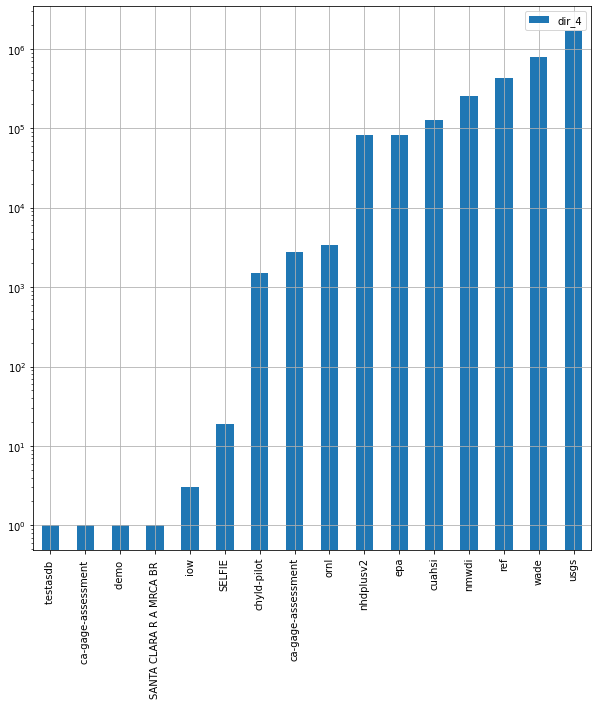

In [11]:
e4sort = e4.sort_values(ascending=True)
plot = e4sort.plot.bar(y='dir_4',legend=True, grid=True, logy = True, figsize=(10, 10))

## Let's try and set a sample from the various sites

In [12]:
# sample the previously generated url data frame
sample_df = urldf.groupby("dir_4").sample(n=2, random_state=1, replace=True)


In [13]:
sample_df.head()

,url,scheme,netloc,path,query,fragment,dir_1,dir_2,dir_3,dir_4,dir_5,dir_6,dir_7,dir_8
440472,https://geoconnex.us/SANTA CLARA R A MRCA BR,,,https://geoconnex.us/SANTA CLARA R A MRCA BR,,,https:,,geoconnex.us,SANTA CLARA R A MRCA BR,NaN,NaN,NaN,NaN
440472,https://geoconnex.us/SANTA CLARA R A MRCA BR,,,https://geoconnex.us/SANTA CLARA R A MRCA BR,,,https:,,geoconnex.us,SANTA CLARA R A MRCA BR,NaN,NaN,NaN,NaN
467711,https://geoconnex.us/SELFIE/usgs/wqp/huc12obs...,,,https://geoconnex.us/SELFIE/usgs/wqp/huc12obs...,,,https:,,geoconnex.us,SELFIE,usgs,wqp,huc12obs,WIDNR_WQX-10001227
467717,https://geoconnex.us/SELFIE/usgs/wqp/huc12obs...,,,https://geoconnex.us/SELFIE/usgs/wqp/huc12obs...,,,https:,,geoconnex.us,SELFIE,usgs,wqp,huc12obs,USGS-431250089282902
3126531,https://geoconnex.us/ca-gage-assessment/gages...,,,https://geoconnex.us/ca-gage-assessment/gages...,,,https:,,geoconnex.us,ca-gage-assessment,gages,11216500,NaN,NaN


In [20]:
import urllib.request
import requests

ul = sample_df["url"]

for item in ul:
    headers, code, dtype = None, None, None
    
    try:
        x = requests.head(item)
        code = x.status_code
        with urllib.request.urlopen(item) as response:
            info = response.info()
            dtype = info.get_content_type()    # -> text/html

        # headers = x.headers()
    except:
        code = "error"
        dtype = "error"
        headers = "error"
    
    print("{}: {} : {} : {}".format(code, dtype, item, headers))

error: error :  https://geoconnex.us/SANTA CLARA R A MRCA BR  : error
error: error :  https://geoconnex.us/SANTA CLARA R A MRCA BR  : error
404: text/html :  https://geoconnex.us/SELFIE/usgs/wqp/huc12obs/WIDNR_WQX-10001227  : None
404: text/html :  https://geoconnex.us/SELFIE/usgs/wqp/huc12obs/USGS-431250089282902  : None
404: application/json :  https://geoconnex.us/ca-gage-assessment/gages/11216500  : None
404: application/json :  https://geoconnex.us/ca-gage-assessment/gages/11156450  : None
404: text/html :  https://geoconnex.us/ca-gage-assessment  : None
404: text/html :  https://geoconnex.us/ca-gage-assessment  : None
404: text/html :  https://geoconnex.us/chyld-pilot/id/hu_nexus/041504030604-inflow  : None
404: text/html :  https://geoconnex.us/chyld-pilot/id/hu/041504030401-drainage_basin  : None
404: text/html :  https://geoconnex.us/cuahsi/his/GHCN/AM000037878  : None
404: text/html :  https://geoconnex.us/cuahsi/his/ShaleNetworkODM/PFBC_Wright_Creek_2109  : None
404: text/ht